In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten

from PIL import Image

In [2]:
batch_size_train=30  #,batch_size= batch_size_train
batch_size_valid=30
targetsize= 50

In [3]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(targetsize,targetsize, 3)) )
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3), padding='SAME', activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         2

In [4]:
model2.load_weights('/home/ordovas/IRONHACK/dice-scores-recognition/model2_d6_augmented_c1.h5')

In [2]:
json_file = open('model2_extendedsamp.json', 'r')
loaded_model_json = json_file.read()

In [3]:
from tensorflow.keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [4]:
loaded_model.load_weights("/home/ordovas/IRONHACK/dice-scores-recognition/model2_1d6_augmented_c2.h5")

In [8]:
loaded_model.compile(Adam(lr=.0002), loss='categorical_crossentropy', metrics= ['accuracy'])


In [10]:
datagen=ImageDataGenerator(rotation_range=180,height_shift_range=0.1,rescale=1.0/255.0
                           ,zoom_range=[0.7,1.1],brightness_range=[0.4,1.2])

In [ ]:
# /home/ordovas/IRONHACK/dice-scores-recognition/own_dataset/d6/test/2/VID_20201209_201842~2_105_3.jpg

In [640]:
lnk="img_testing/IMG_20201212_120709.jpg"
#lnk="/home/ordovas/IRONHACK/dice-scores-recognition/own_dataset/1d6/test/6/VID_20201211_171045_150.jpg"

img_pru = cv2.imread(lnk, cv2.COLOR_RGB2BGR)

im = Image.open(lnk)
#im.show('image',im)
type(im)
img_pru = np.asarray(im)
img_pru.shape

(2688, 1512, 3)

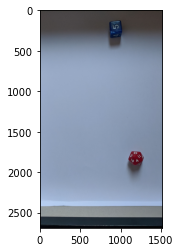

In [641]:
plt.imshow(img_pru)

In [642]:
img_pru.shape
blue=np.zeros((img_pru.shape[0],img_pru.shape[1]))
blue.shape

(2688, 1512)

In [643]:
nn=20
blue=np.zeros((img_pru.shape[0]//nn,img_pru.shape[1]//nn))
red=np.zeros((img_pru.shape[0]//nn,img_pru.shape[1]//nn))
for i in range(1,blue.shape[0]):
    for j in range(1,blue.shape[1]):
        if 200 < np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,0]-img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,1]): # blue
            if 50 < np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,2]
                               -np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,:])): #no white
                blue[i,j]=1.

                
                #blue=np.zeros((img_pru.shape[0]//nn,img_pru.shape[1]//nn))

for i in range(1,red.shape[0]):
    for j in range(1,red.shape[1]):
        if 200 < np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,1]-img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,2]): # blue
            if 40 < np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,0]
                               -np.median(img_pru[i*nn:i*nn+nn,j*nn:j*nn+nn,:])): #no white
                red[i,j]=1.


In [644]:
#resized = cv2.resize(blue, (50,50), interpolation = cv2.INTER_CUBIC)

In [645]:
#resized2= cv2.resize(resized[20:50,40:70,:],(100,100),interpolation = cv2.INTER_AREA)
blue.shape

(134, 75)

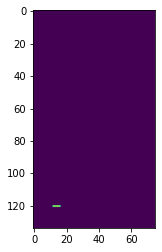

In [646]:
plt.imshow(blue)

In [647]:
blue.max()

1.0

In [648]:
np.sum(blue)

5.0

In [649]:
np.argmax(blue, axis=1)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [650]:
ss=0
r=5
xm=int(np.max(np.argmax(blue, axis=0)))
ym=int(np.max(np.argmax(blue, axis=1)))
print(xm*nn,ym*nn)
while ss < np.sum(blue)*0.900:
    r+=1
    croped = blue[max(xm-r,0):min(xm+r,blue.shape[0]),max(ym-r,0):min(ym+r,blue.shape[1])]
    ss=np.sum(croped)
    print(ss/np.sum(blue),r*2,max(xm-r,0),min(xm+r,blue.shape[0]),max(ym-r,0),min(ym+r,blue.shape[1]))
    
xm=xm*nn
ym=ym*nn
r=int(r*nn*1.2)

xm,ym,r

2400 240
1.0 12 114 126 6 18


(2400, 240, 144)

In [651]:
max(xm-r,0),min(xm+r,img_pru.shape[0]),max(ym-r,0),min(ym+r,blue.shape[1])

(2256, 2544, 96, 75)

In [652]:
resized2= cv2.resize(img_pru[max(xm-r,0):min(xm+r,img_pru.shape[0]),max(ym-r,0):min(ym+r,img_pru.shape[1])],(100,100),interpolation = cv2.INTER_AREA)

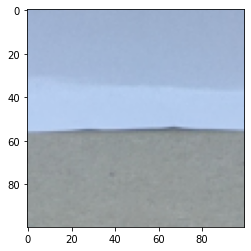

In [653]:
plt.imshow(resized2)

In [654]:
np.mean(np.argmax(resized, axis=0))

25.18

In [123]:
np.mean(np.argmax(resized, axis=1))

22.54

In [441]:
import imutils

img = cv2.imread(lnk)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([10,20,0])
upper_range = np.array([90,195,255])
mask = cv2.inRange(hsv, lower_range, upper_range)

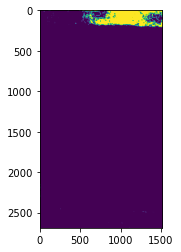

In [442]:
plt.imshow(mask)

In [67]:
resized[60,70,:]

array([191, 191, 181], dtype=uint8)

In [17]:
resized[0,0,:]

array([194, 191, 184], dtype=uint8)

In [163]:
resized=resized/255

In [164]:
aa=np.array((resized,resized)).shape

In [165]:
"/home/ordovas/IRONHACK/dice-scores-recognition/own_dataset/d6/test/1/VID_20201211_170616_168.jpg"

'/home/ordovas/IRONHACK/dice-scores-recognition/own_dataset/d6/test/1/VID_20201211_170616_168.jpg'

In [166]:
labels=['5', '1', '4', '3', '6', '2']

In [167]:
pp=loaded_model.predict( np.array( [resized,] )  ) 

In [168]:
pp

array([[7.0938247e-23, 0.0000000e+00, 1.2310487e-08, 1.5589259e-29,
        2.2104619e-15, 1.0000000e+00]], dtype=float32)

In [122]:
loaded_model.predict_classes( np.array( [resized,] )  ) 

array([1])

In [82]:
#print(os.listdir('own_dataset/1d6/test/1/'))

['VID_20201211_170616_168.jpg', 'VID_20201211_170126_132.jpg', 'VID_20201211_170953_48.jpg', 'VID_20201211_170732_150.jpg', 'VID_20201211_170953_204.jpg', 'VID_20201211_170126_84.jpg', 'VID_20201211_170126_150.jpg', 'VID_20201211_170953_168.jpg', 'VID_20201211_170126_72.jpg', 'VID_20201211_170126_216.jpg', 'VID_20201211_170953_300.jpg', 'VID_20201211_170953_288.jpg', 'VID_20201211_170953_240.jpg', 'VID_20201211_170616_36.jpg', 'VID_20201211_160814_30.jpg', 'VID_20201211_170126_90.jpg', 'VID_20201211_170953_270.jpg', 'VID_20201211_170126_204.jpg', 'VID_20201211_170616_288.jpg', 'VID_20201211_170616_108.jpg', 'VID_20201211_160814_156.jpg', 'VID_20201211_160814_276.jpg', 'VID_20201211_170732_48.jpg', 'VID_20201211_170616_216.jpg', 'VID_20201211_170732_120.jpg', 'VID_20201211_170616_84.jpg', 'VID_20201211_160814_348.jpg', 'VID_20201211_160814_0.jpg', 'VID_20201211_160814_228.jpg', 'VID_20201211_160814_132.jpg', 'VID_20201211_170616_252.jpg', 'VID_20201211_170732_24.jpg', 'VID_20201211_1608

In [178]:
dd=[]
labels=[5, 1, 4, 3, 6, 2]
for l in os.listdir("own_dataset/1d6/test/6"):
    #img_pru = cv2.imread()
    im = Image.open("own_dataset/1d6/test/6/"+l)

    img_pru = np.asarray(im)
    resized = cv2.resize(img_pru, (100,100), interpolation = cv2.INTER_AREA)
    resized=resized/255
    la  = labels[loaded_model.predict_classes( np.array( [resized,] )  )[0]] 
    dd.append( la )
    if la != 6:
        print(l)

VID_20201211_171045_156.jpg
VID_20201211_171045_150.jpg


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0., 144.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

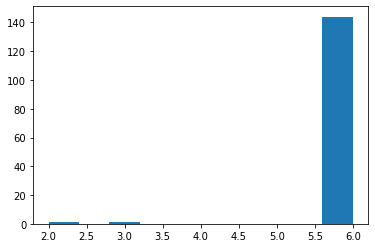

In [175]:
plt.hist(dd)

In [176]:
print(dd)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [135]:
labels=['5', '1', '4', '3', '6', '2']

In [3]:
500*250/3600

34.72222222222222

In [2]:
69/24

2.875